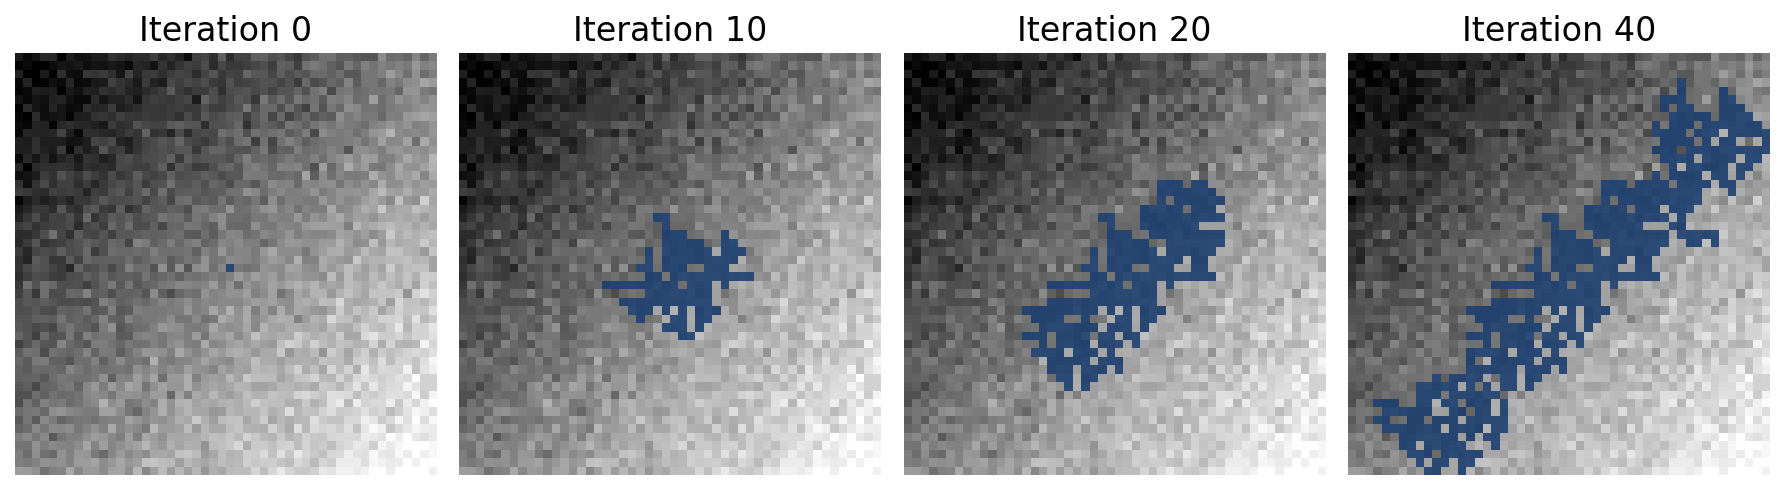

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
H, W = 50, 50          # Grid dimensions
threshold = 20          # Intensity difference threshold
seed_point = (25, 25)   # Starting seed (row, col)
n = 10                   # Interval step to capture states (for demonstration)

# Generate a synthetic 2D "image"
x = np.linspace(0, 255, W)
y = np.linspace(0, 255, H)
X, Y = np.meshgrid(x, y)
image = (X + Y) / 2
# Add some noise
image += np.random.normal(scale=15, size=image.shape)
image = np.clip(image, 0, 255)

# Initialize mask: 0 = not visited, 1 = flooded
mask = np.zeros_like(image, dtype=int)

start_intensity = image[seed_point]
mask[seed_point] = 1

# Queue for BFS-like approach
queue = deque([seed_point])
visited = set([seed_point])

# Directions for neighbors (up, down, left, right)
directions = [(0,1),(0,-1),(1,0),(-1,0)]

step = 0

# To store snapshots of the mask at desired steps
steps_to_save = [0, n, 2*n, 4*n]
snapshots = {}

# Save the initial state
snapshots[0] = mask.copy()

while queue:
    current_level = len(queue)

    for _ in range(current_level):
        r, c = queue.popleft()
        
        # Check neighbors
        for dr, dc in directions:
            nr, nc = r+dr, c+dc
            if 0 <= nr < H and 0 <= nc < W and (nr, nc) not in visited:
                if abs(image[nr, nc] - start_intensity) <= threshold:
                    mask[nr, nc] = 1
                    queue.append((nr, nc))
                visited.add((nr, nc))
    
    step += 1
    if step in steps_to_save:
        snapshots[step] = mask.copy()

# Ensure all snapshots are available or use the final state if ended early
for s in steps_to_save:
    if s not in snapshots:
        snapshots[s] = mask.copy()

# Increase DPI for higher resolution and adjust font size
fig, axes = plt.subplots(1, 4, figsize=(12,4), dpi=150)

for i, s in enumerate(steps_to_save):
    ax = axes[i]
    ax.set_title(f"Iteration {s}", fontsize=16)  # Increase font size
    ax.imshow(image, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    flooded_overlay = np.ma.masked_where(snapshots[s] == 0, snapshots[s])
    ax.imshow(flooded_overlay, cmap='Blues', alpha=0.75, vmin=0, vmax=1)
    ax.axis('off')

plt.tight_layout()
plt.show()
